In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt


In [2]:
# Read the log file
log_path = '../NAMD_GOMC_started_at_cycle_No_0.log'
with open(log_path, 'r') as file:
    lines = file.readlines()



In [4]:
# Extract TIME_STATS_DATA lines
data = []
for line in lines:
    if line.startswith('TIME_STATS_DATA:'):
        # Split by whitespace and filter empty
        parts = [p for p in re.split(r'\s+', line.strip().split(':', 1)[1]) if p]
        # Take first 5 parts
        cycle, namd, gomc, python_time, total = parts[:5]
        data.append({
            'Cycle_No': int(cycle),
            'NAMD_time_s': float(namd),
            'GOMC_time_s': float(gomc),
            'Python_time_s': float(python_time),
            'Total_time_s': float(total),
        })

# show the top 5 rows of the data
# Create DataFrame
df = pd.DataFrame(data)
print(df.head())

   Cycle_No  NAMD_time_s  GOMC_time_s  Python_time_s  Total_time_s
0         0    14.974753     0.584013       0.018360     15.577126
1         1     3.675598     0.575005       0.011497      4.262100
2         2     3.653093     0.569419       0.011828      4.234340
3         3     3.674551     0.566246       0.010057      4.250854
4         4     3.726968     0.570136       0.009982      4.307086


In [ ]:
# Display the DataFrame
display(df.head(10))


,Cycle_No,NAMD_time_s,GOMC_time_s,Python_time_s,Total_time_s
0,0,14.974753,0.584013,0.018360,15.577126
1,1,3.675598,0.575005,0.011497,4.262100
2,2,3.653093,0.569419,0.011828,4.234340
3,3,3.674551,0.566246,0.010057,4.250854
4,4,3.726968,0.570136,0.009982,4.307086
5,5,3.671088,0.550716,0.011721,4.233525
6,6,3.612048,0.579060,0.012432,4.203540
7,7,3.718663,0.591881,0.011956,4.322500
8,8,3.702511,0.558234,0.010242,4.270987
9,9,3.669061,0.564360,0.012687,4.246108


In [ ]:
# Checking for proof checking if the summation of the columnms is equal to the Total_time_s
# Check if the sum of component times equals Total_time_s
# sum the three component times into a new column
df['Component_Sum_s'] = df['NAMD_time_s'] + df['GOMC_time_s'] + df['Python_time_s']

In [9]:
# Display the DataFrame
display(df.head(10))

,Cycle_No,NAMD_time_s,GOMC_time_s,Python_time_s,Total_time_s,Component_Sum_s
0,0,14.974753,0.584013,0.018360,15.577126,15.577126
1,1,3.675598,0.575005,0.011497,4.262100,4.262100
2,2,3.653093,0.569419,0.011828,4.234340,4.234340
3,3,3.674551,0.566246,0.010057,4.250854,4.250854
4,4,3.726968,0.570136,0.009982,4.307086,4.307086
5,5,3.671088,0.550716,0.011721,4.233525,4.233525
6,6,3.612048,0.579060,0.012432,4.203540,4.203540
7,7,3.718663,0.591881,0.011956,4.322500,4.322500
8,8,3.702511,0.558234,0.010242,4.270987,4.270987
9,9,3.669061,0.564360,0.012687,4.246108,4.246108


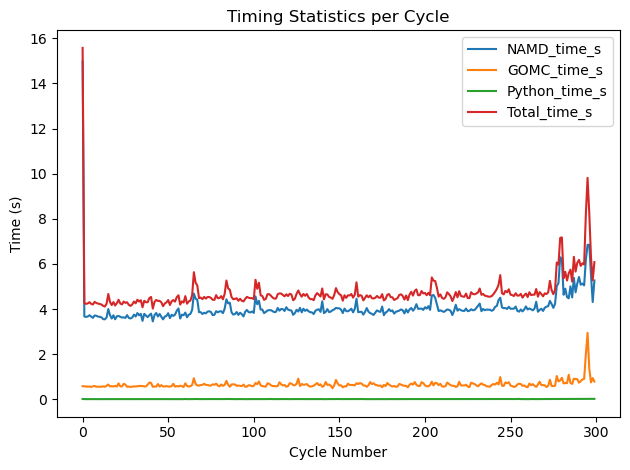

In [7]:
# Plot the data
plt.figure()
plt.plot(df['Cycle_No'], df['NAMD_time_s'], label='NAMD_time_s')
plt.plot(df['Cycle_No'], df['GOMC_time_s'], label='GOMC_time_s')
plt.plot(df['Cycle_No'], df['Python_time_s'], label='Python_time_s')
plt.plot(df['Cycle_No'], df['Total_time_s'], label='Total_time_s')
plt.xlabel('Cycle Number')
plt.ylabel('Time (s)')
plt.title('Timing Statistics per Cycle')
plt.legend()
plt.tight_layout()
plt.show()
